In [1]:
import  matplotlib.pyplot as plt
import json
import os
from PIL import Image, ImageDraw


class DirectoryManager:
    """
    A helper class to manage directory operations such as ensuring directories exist.
    """
    @staticmethod
    def ensure_directory_exists(file_path):
        """
        Ensures that the directory for the given file path exists. 
        Creates the directory if it does not exist.
        Args:
            file_path (str): The file path for which the directory needs to be checked/created.
        """
        directory = os.path.dirname(file_path)
        if not os.path.exists(directory):
            os.makedirs(directory)
            
directory_manager = DirectoryManager()


In [2]:
class ImageMaskGenerator:
    """
    Cette classe génère des masques d'images basés sur des annotations de polygones fournies dans un fichier JSON.
    """

    def __init__(self, json_path, images_folder, masks_folder, YN = False):
        """
        Initialise le générateur de masques d'images.

        :param json_path: Chemin vers le fichier JSON contenant les annotations.
        :param images_folder: Dossier contenant les images originales.
        :param masks_folder: Dossier de destination pour sauvegarder les masques générés.
        :param YN : booléen qui indique qu'on utilise un autre format json venant de Label Studio.
        """
        self.json_path = json_path
        self.images_folder = images_folder
        self.masks_folder = masks_folder
        self.YN = YN

    def load_json_data(self):
        """
        Charge les données JSON du fichier spécifié.

        :return: Les données JSON chargées.
        """
        with open(self.json_path) as file:
            return json.load(file)

    def generate_masks(self):
        """
        Génère des masques pour chaque image basée sur les annotations de polygones dans le fichier JSON.
        """
        data = self.load_json_data()
        
        for label_info in data:
            if self.YN : 
                image_name = label_info.get('data').get('image').split('-')[1]
            else : 
                image_name = label_info['data_row']['external_id']
            image_path = os.path.join(self.images_folder, image_name)
            image = Image.open(image_path)

            mask = self.create_mask(image, label_info)
            plt.imshow(mask)
            self.save_mask(mask, image_name)

    def create_mask(self, image, label_info):
        """
        Crée un masque pour une image unique basée sur les annotations de polygones.

        :param image: L'objet Image PIL de l'image.
        :param label_info: Les informations d'étiquetage pour cette image.
        :return: L'objet Image PIL du masque.
        """
        width, height = image.size
        mask = Image.new('L', (width, height), 0)
        draw = ImageDraw.Draw(mask)
        
        if self.YN : 
            polygons = []
            for i in range(len(label_info.get('annotations')[0].get('result'))):
                polygons.append(label_info.get('annotations')[0].get('result')[i].get('value').get('points'))
            
            for polygon in polygons:
                points = [(point[0]*width/100, point[1]*height/100) for point in polygon]
                draw.polygon(points, fill=255)
            
        else : 
            polygons = [obj["polygon"] for obj in label_info["projects"]["clqxivkqq03v807wi5dp3e5yk"]["labels"][0]["annotations"]["objects"]]
            for polygon in polygons:
                points = [(point['x'], point['y']) for point in polygon]
                draw.polygon(points, fill=255)

        return mask

    def save_mask(self, mask, image_name):
        """
        Sauvegarde le masque dans le dossier spécifié.

        :param mask: L'objet Image PIL du masque à sauvegarder.
        :param image_name: Le nom de l'image source.
        """
        mask_file_name = os.path.basename(image_name).replace('.png', '_mask.png')
        mask_path = os.path.join(self.masks_folder, mask_file_name)
        # create directory if not exists
        directory_manager.ensure_directory_exists(mask_path)
        mask.save(mask_path)
        print(f"Masque sauvegardé dans : {mask_path}")


Masque sauvegardé dans : ../data/masks\image_yn_1_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_2_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_3_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_4_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_5_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_6_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_7_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_8_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_9_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_11_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_12_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_13_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_14_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_15_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_16_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_17_mask.png
Masque sauvegardé dans : ../data/masks\image_yn_1

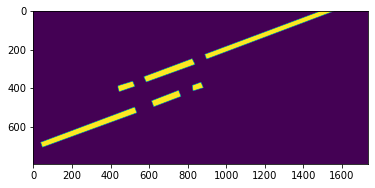

In [3]:
yn_generator = ImageMaskGenerator('../json/mask.json',
                               '../data/images', 
                               '../data/masks',
                               YN = True)
yn_generator.generate_masks()


Masque sauvegardé dans : ../data/masks\image_max_1_mask.png
Masque sauvegardé dans : ../data/masks\image_max_2_mask.png
Masque sauvegardé dans : ../data/masks\image_max_4_mask.png
Masque sauvegardé dans : ../data/masks\image_max_5_mask.png
Masque sauvegardé dans : ../data/masks\image_max_6_mask.png
Masque sauvegardé dans : ../data/masks\image_max_7_mask.png
Masque sauvegardé dans : ../data/masks\image_max_8_mask.png
Masque sauvegardé dans : ../data/masks\image_max_9_mask.png
Masque sauvegardé dans : ../data/masks\image_max_10_mask.png
Masque sauvegardé dans : ../data/masks\image_max_11_mask.png
Masque sauvegardé dans : ../data/masks\image_max_13_mask.png
Masque sauvegardé dans : ../data/masks\image_max_14_mask.png
Masque sauvegardé dans : ../data/masks\image_max_15_mask.png
Masque sauvegardé dans : ../data/masks\image_max_16_mask.png
Masque sauvegardé dans : ../data/masks\image_max_17_mask.png
Masque sauvegardé dans : ../data/masks\image_max_18_mask.png
Masque sauvegardé dans : ../data

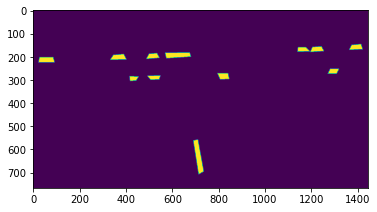

In [4]:
mr_generator = ImageMaskGenerator('../json/mask_maxime.ndjson',
                               '../data/images', 
                               '../data/masks',
                               YN = False)
mr_generator.generate_masks()

Masque sauvegardé dans : ../data/test/masks\image_test_1_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_2_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_3_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_4_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_5_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_6_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_7_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_8_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_9_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_10_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_16_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_17_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_18_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_19_mask.png
Masque sauvegardé dans : ../data/test/masks\image_test_20_mask.png
Masq

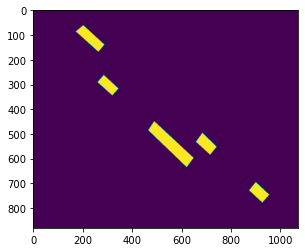

In [5]:
yn_generator_test_data = ImageMaskGenerator('../json/mask_test.json',
                               '../data/test/images', 
                               '../data/test/masks',
                               YN = True)
yn_generator_test_data.generate_masks()